In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [7]:
# 1. Wygenerowanie danych
X, y = make_blobs(n_samples=200, centers=2, random_state=42, cluster_std=7)

# 2. Podział na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Kernel: linear, Accuracy: 0.82
Kernel: rbf, Accuracy: 0.83
Kernel: poly, Accuracy: 0.73


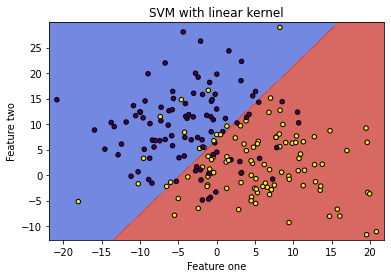

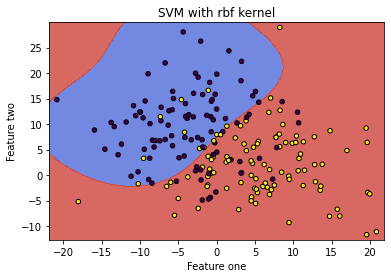

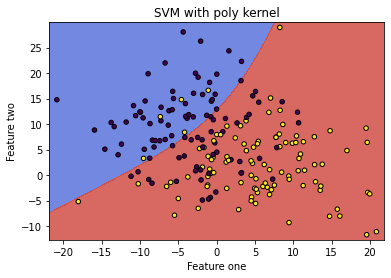

In [8]:
# 3. Nauka i testowanie modelu SVM dla różnych jąder
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    # Tworzenie i trenowanie modelu
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    
    # Predykcja i ocena
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Kernel: {kernel}, Accuracy: {acc:.2f}")
    
    # Wizualizacja granic decyzyjnych
    plt.figure()
    plt.title(f"SVM with {kernel} kernel")
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.xlabel("Feature one")
    plt.ylabel("Feature two")
    plt.show()